In [32]:
from manim import *
from pathlib import Path
import shutil
import time
import json

params = " -v WARNING -r 80,40 -s  --disable_caching Example"
    
name_snippet_pairs = {}

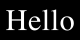

In [33]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Text("Hello", color=WHITE)
        self.add(mob)
        self.camera.frame.scale(1/8)
###******        
image_full_name = "Text.png"
snippet = 'mob = Text("Hello", color=WHITE)'
name_snippet_pairs[image_full_name] = snippet

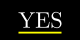

In [34]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        t = Tex("YES")
        ul = Underline(t, color=YELLOW)
        self.add(t, ul)
        self.camera.frame.scale(1/8)
###******        
image_full_name = "Underline.png"
snippet = 't = Tex("YES")\nul = Underline(t, color=YELLOW)'
name_snippet_pairs[image_full_name] = snippet

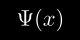

In [35]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = MathTex(r"\Psi(x)", color=WHITE)
        self.add(mob)
        self.camera.frame.scale(1/8)
###******        
image_full_name = "MathTex.png"
snippet = 'mob = MathTex(r"\Psi(x)", color=WHITE)'
name_snippet_pairs[image_full_name] = snippet

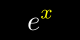

In [36]:
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = MathTex(r"e^x",substrings_to_isolate="x")
        mob.set_color_by_tex("x", YELLOW)
        self.add(mob)
        self.camera.frame.scale(1/10)
###******        
image_full_name = "MathTex2.png"
snippet = 'mob = MathTex(r"e^x",substrings_to_isolate="x") \nmob.set_color_by_tex("x", YELLOW)'
name_snippet_pairs[image_full_name] = snippet

# Save here!

In [37]:
file_name = "Mobjects_Text"
folder_name = file_name + "_files"
notebook_name = file_name + ".ipynb"
markdown_name = file_name + ".md"
!rm -r $folder_name
!jupyter nbconvert $notebook_name --to markdown
!rm -r $markdown_name
base_directory = Path.cwd() / folder_name
target_directory = Path.cwd() / "images"
target_directory.mkdir(parents=True, exist_ok=True)

import os
paths = sorted(Path(base_directory).iterdir(), key=os.path.getmtime)
dest_names = list(name_snippet_pairs.keys())
new_keys = []
for num, (p,des) in enumerate(zip(paths,dest_names)):
    to_path = target_directory /  f"{file_name}_{num:03}_{des}"   
    shutil.copy(p,  to_path)
    new_keys.append(to_path.name)
    
new_name_snippet_pairs ={} 
new_values = list(name_snippet_pairs.values())
for key, value in zip(new_keys,new_values):
    new_name_snippet_pairs[key]=value
with open(f'{file_name}.json', 'w') as fp:
    json.dump(new_name_snippet_pairs, fp,indent=2)
display(new_name_snippet_pairs)
!rm -r $folder_name
!git add .

rm: Mobjects_Text_files: No such file or directory
[NbConvertApp] Converting notebook Mobjects_Text.ipynb to markdown
[NbConvertApp] Support files will be in Mobjects_Text_files/
[NbConvertApp] Making directory Mobjects_Text_files
[NbConvertApp] Making directory Mobjects_Text_files
[NbConvertApp] Making directory Mobjects_Text_files
[NbConvertApp] Making directory Mobjects_Text_files
[NbConvertApp] Writing 3800 bytes to Mobjects_Text.md


{'Mobjects_Text_000_Text.png': 'mob = Text("Hello", color=WHITE)',
 'Mobjects_Text_001_Underline.png': 't = Tex("YES")\nul = Underline(t, color=YELLOW)',
 'Mobjects_Text_002_MathTex.png': 'mob = MathTex(r"\\Psi(x)", color=WHITE)',
 'Mobjects_Text_003_MathTex2.png': 'mob = MathTex(r"e^x",substrings_to_isolate="x") \nmob.set_color_by_tex("x", YELLOW)'}